In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
display(train.head(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- missing value! Above the information, a lot of missing value

In [6]:
# target variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
missing = train.isnull().sum().sort_values(ascending = False)
missing.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

# Data Preprocessing

1. missing value

- First I drop missing value greater than 100
- In my opinion, these missing values represent objects for which data imputation is not feasible. Frankly, I'm unsure about exactly objects like PoolQC.I don't know that was excllent or good. Therefore, I have chosen to drop them
- In addition, these features have a significant number of missing values. Therefore, dropping them is a great choice

In [8]:
train.drop(['PoolQC','MiscFeature','Alley','Fence',
            'MasVnrType','FireplaceQu','LotFrontage'],axis = 1,inplace = True)
test.drop(['PoolQC','MiscFeature','Alley','Fence',
            'MasVnrType','FireplaceQu','LotFrontage'],axis = 1,inplace = True)

2. Categorical_data and Numerical_data

In [9]:
categorical_data = [k for k in train.columns if train[k].dtype == 'object']
numerical_data = [y for y in train.columns if train[y].dtype != 'object']

> observe categorical_data

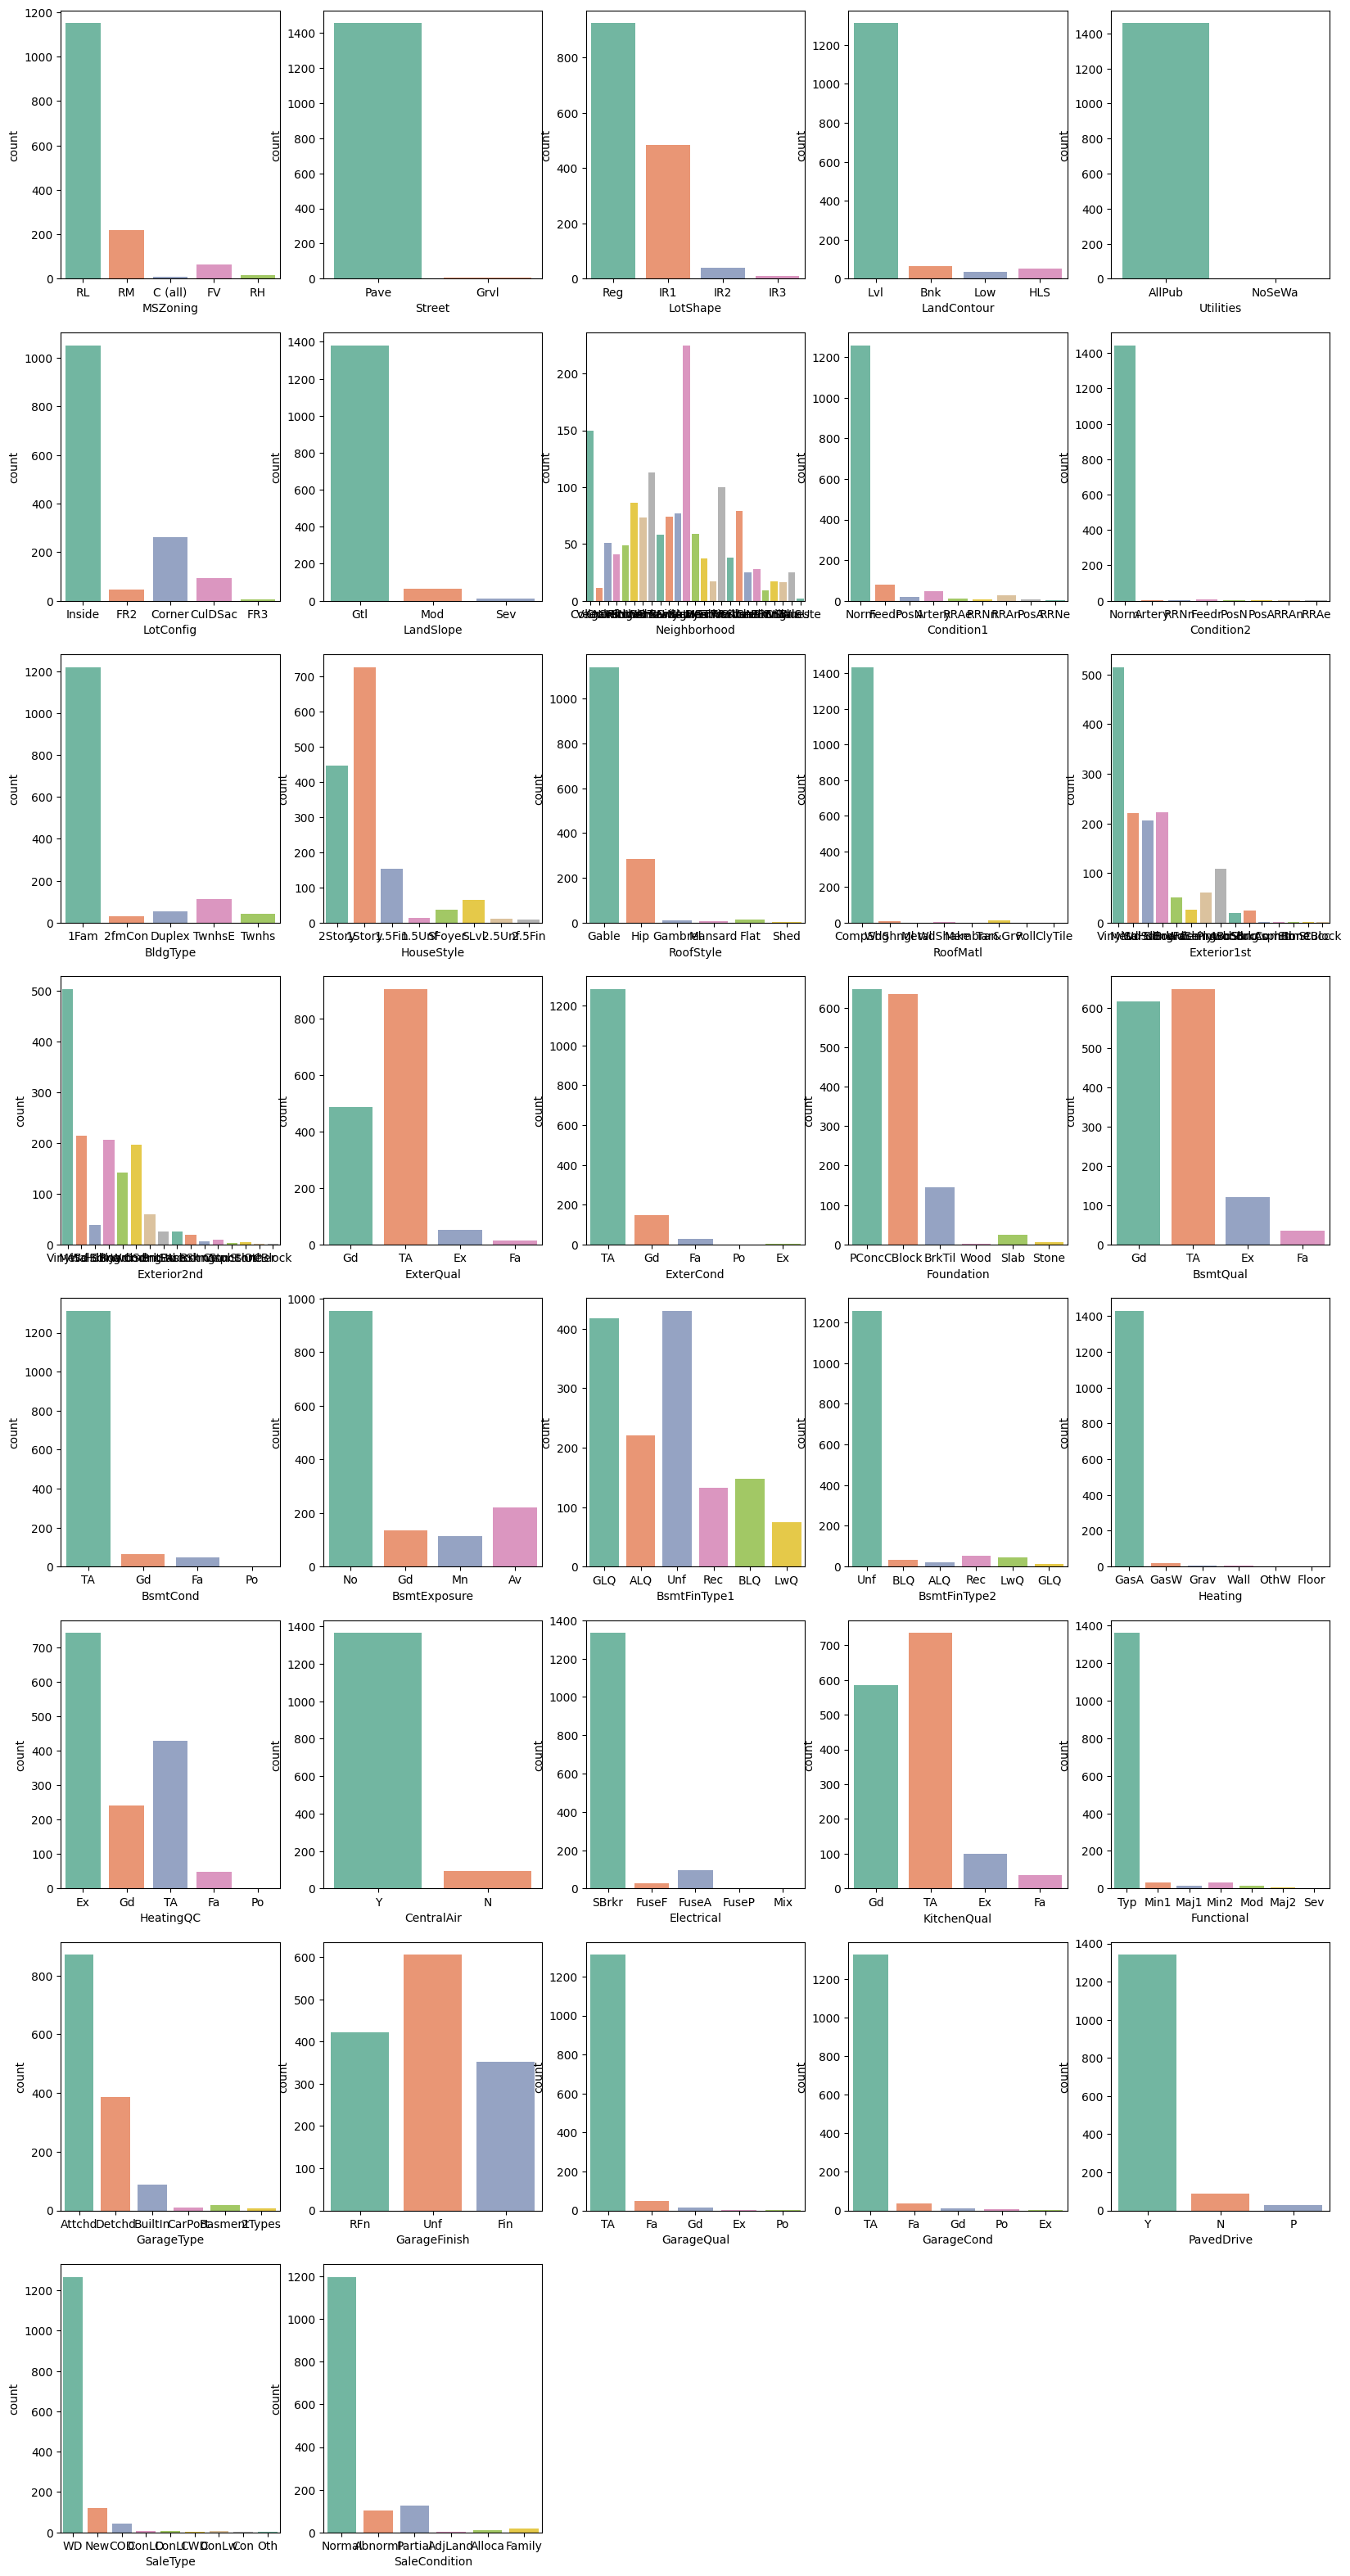

In [10]:
plt.figure(figsize = (20,40))
for i, columns in enumerate(categorical_data, start=1):
    plt.subplot(8,5,i)
    sns.countplot(x = columns , data = train , palette = 'Set2')
plt.show()

- Above information shows that some features are imbalanced. Only focus on specific value 
- Id is not a useful feature,so I drop it
> Therefore I drop that features only focus on specific value

In [11]:
train.drop(['Street','Utilities','LandContour','Condition1','Condition2',
           'LandSlope','BldgType','RoofMatl','ExterCond','BsmtCond','BsmtFinType2',
           'Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond',
           'SaleType','SaleCondition','Id'],axis = 1 ,inplace = True)
test.drop(['Street','Utilities','LandContour','Condition1','Condition2',
           'LandSlope','BldgType','RoofMatl','ExterCond','BsmtCond','BsmtFinType2',
           'Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond',
           'SaleType','SaleCondition','Id'],axis = 1 ,inplace = True)

> observe outlier

In [12]:
categorical_data = [k for k in train.columns if train[k].dtype == 'object']

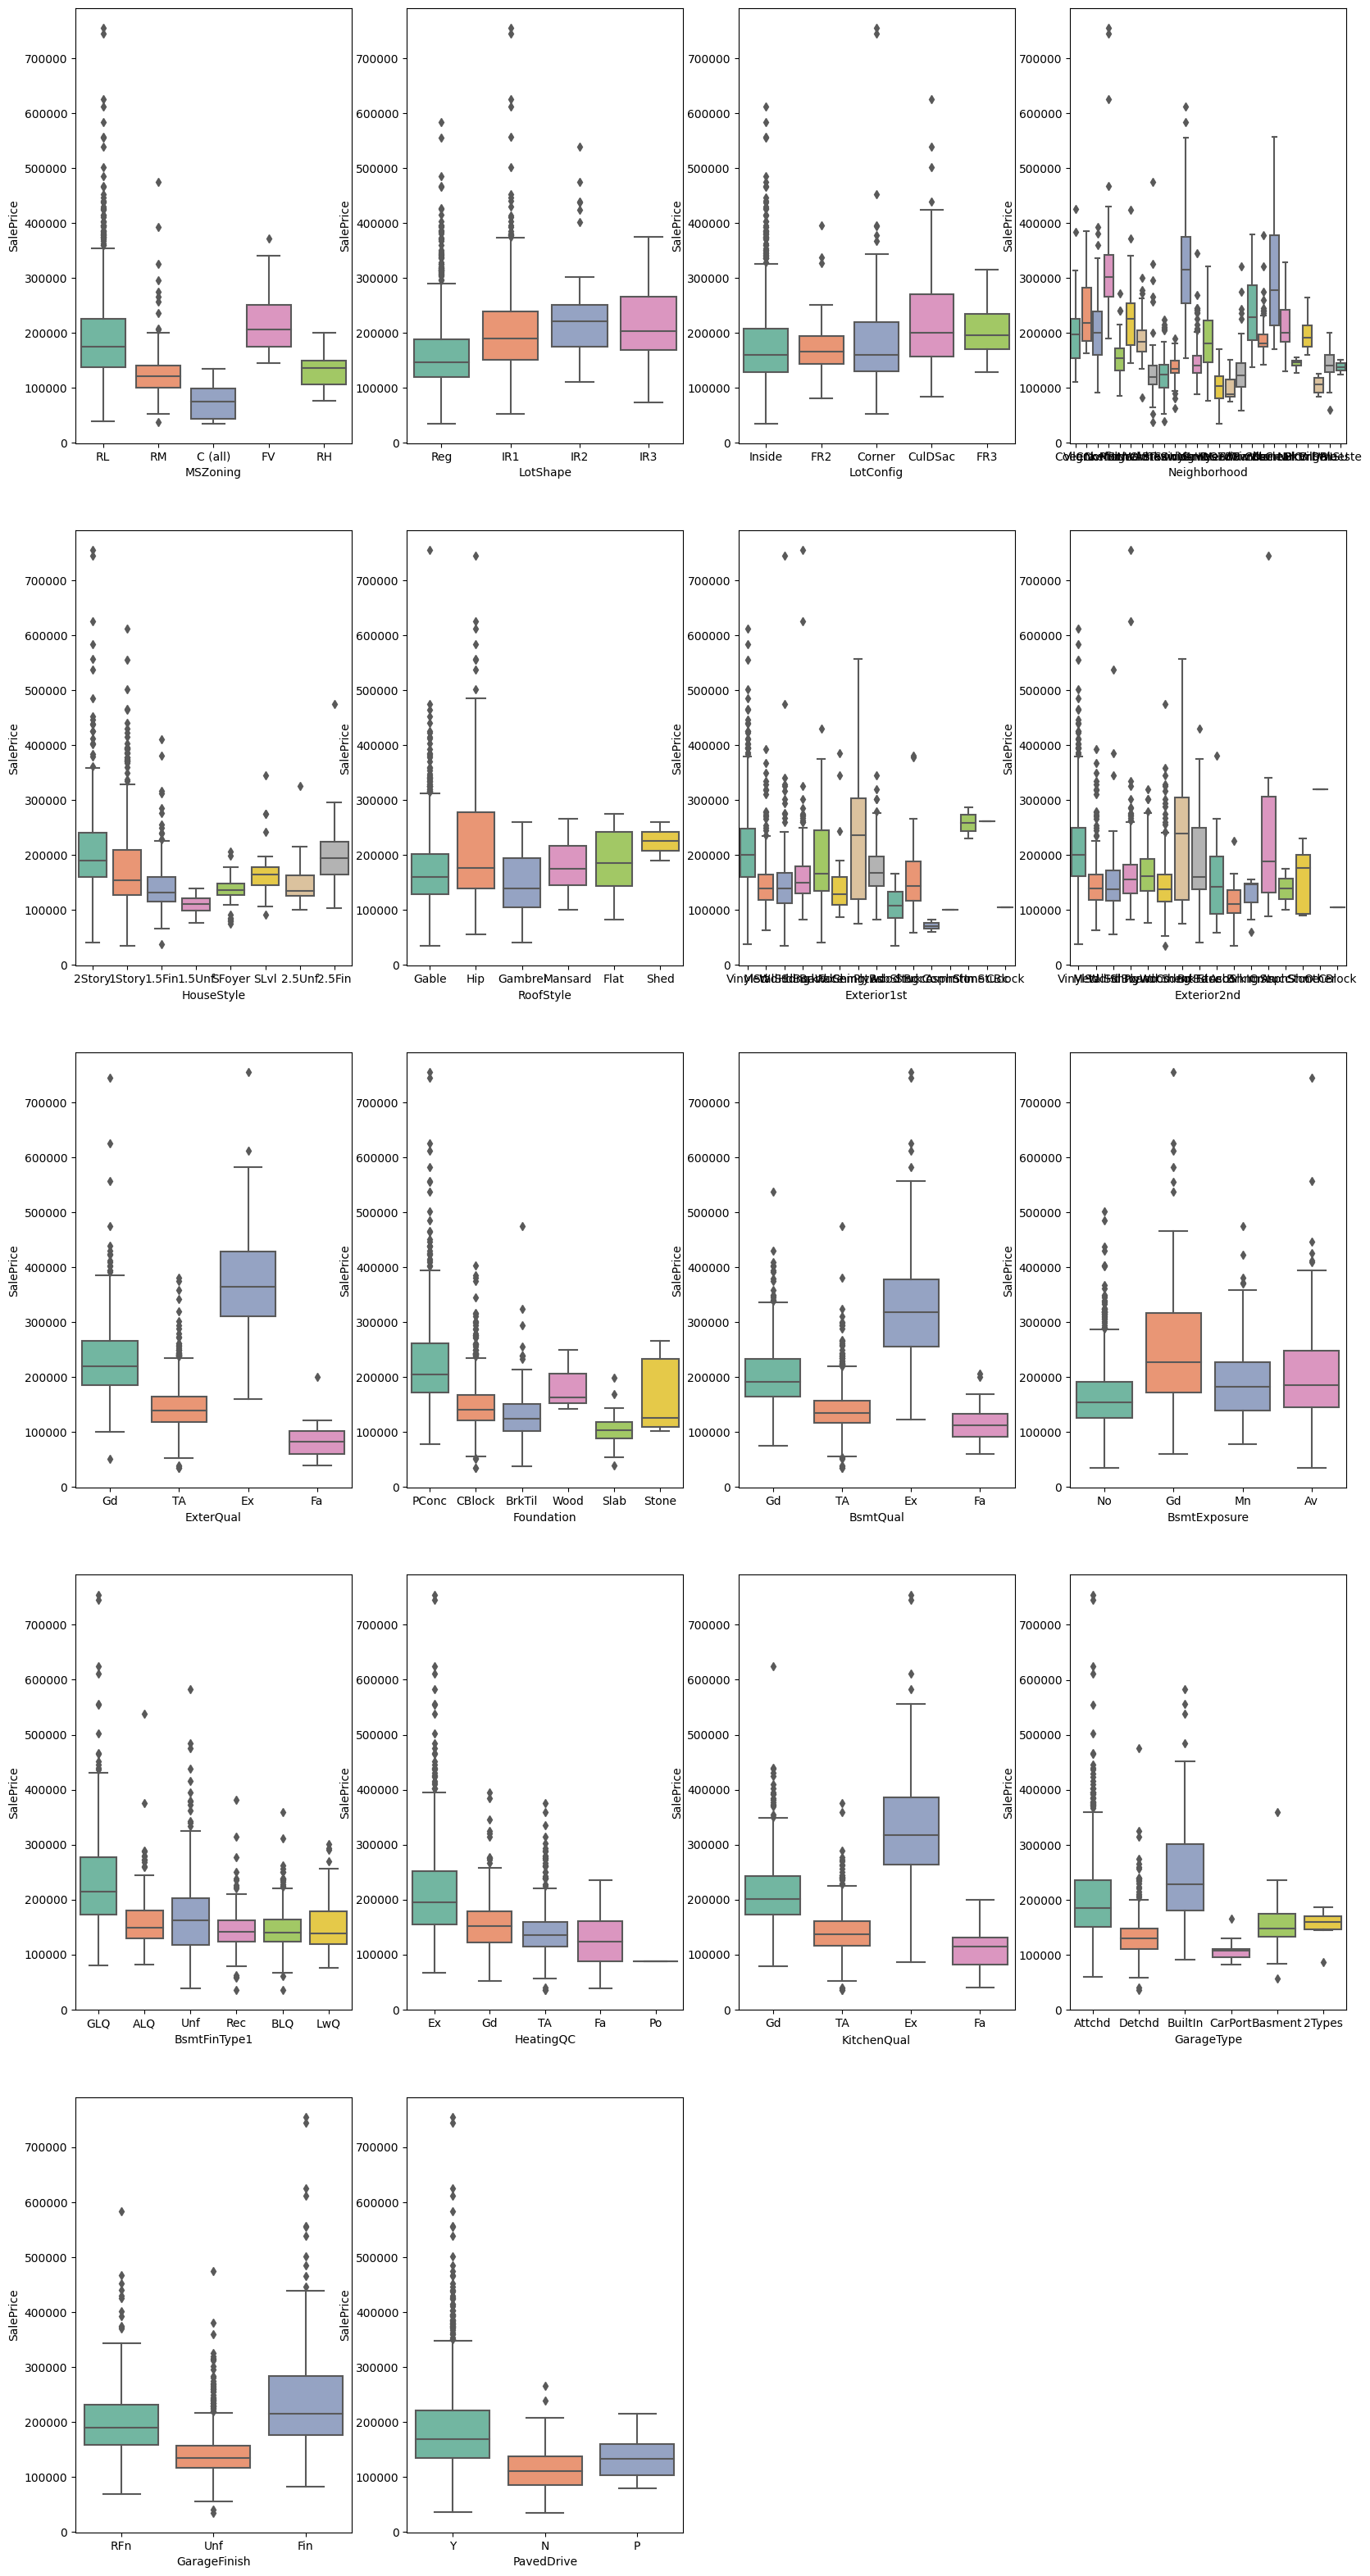

In [13]:
plt.figure(figsize = (20,40))
for i , columns in enumerate(categorical_data , start = 1):
    plt.subplot(5,4,i)
    sns.boxplot(x = columns ,y = 'SalePrice' ,data = train, palette = 'Set2')
plt.show()

> observe numerical data

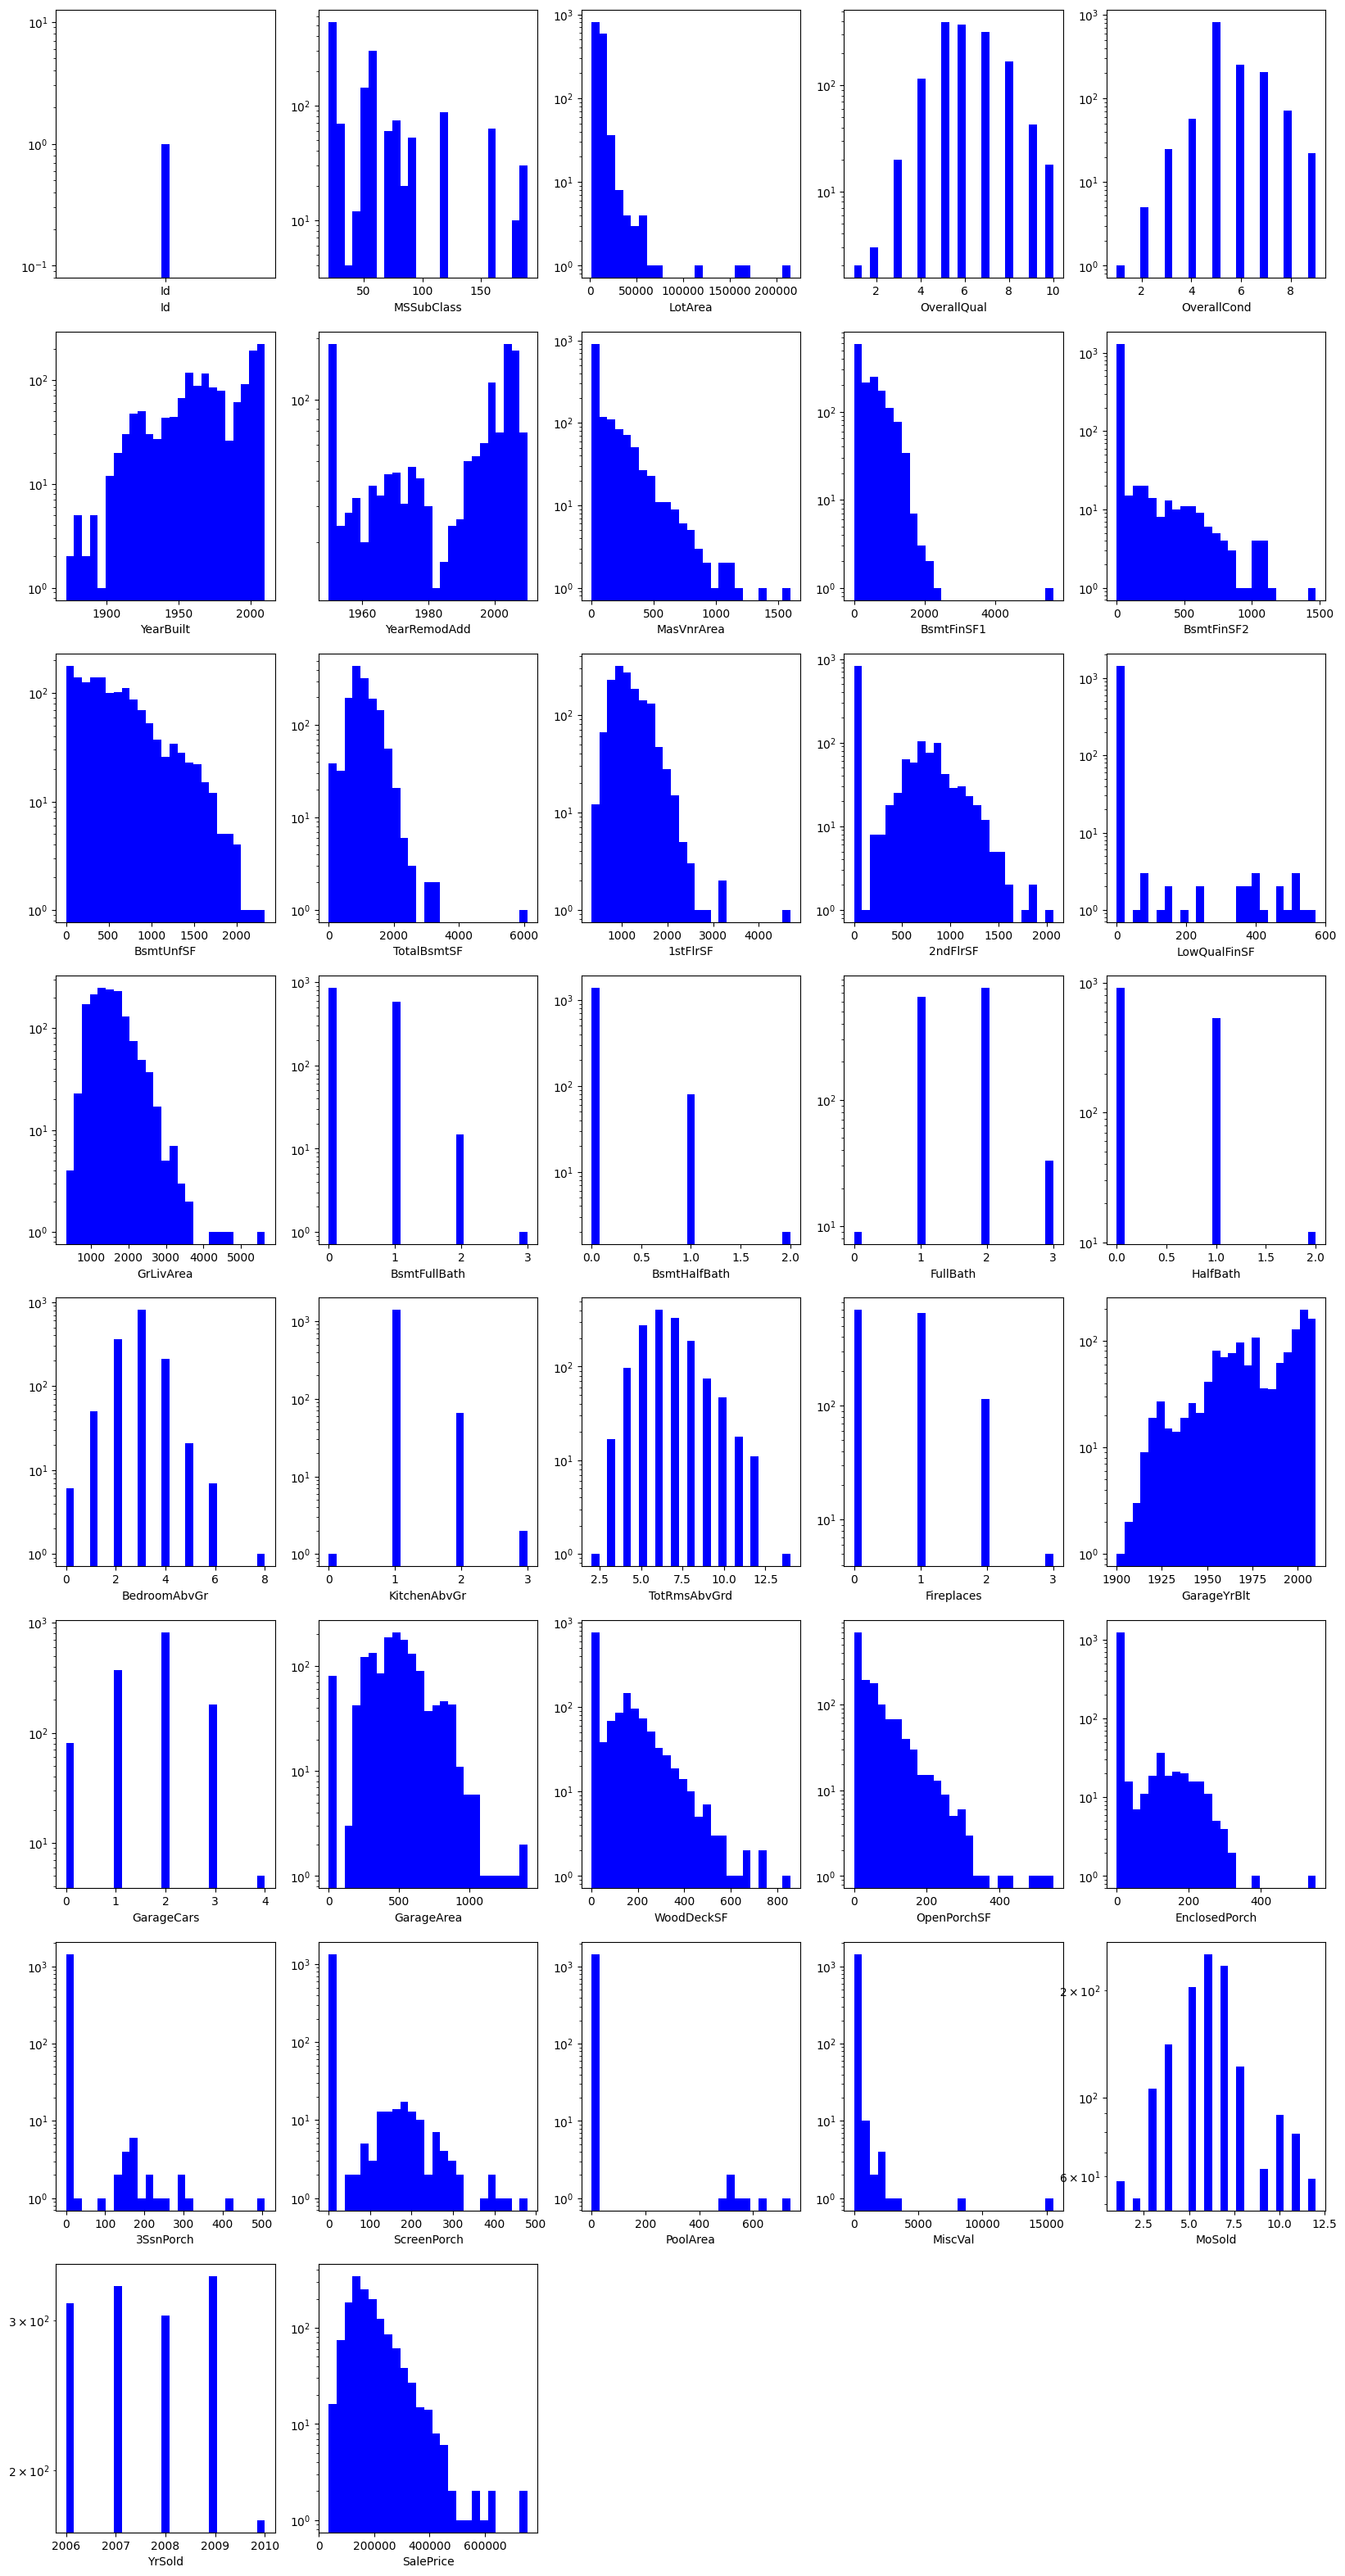

In [14]:
plt.figure(figsize = (20,40))
for i , columns in enumerate(numerical_data , start = 1):
    plt.subplot(8,5,i)
    plt.hist(x = columns ,bins = 25 , data = train ,color = 'blue')
    plt.xlabel(columns)
    plt.yscale('log')
plt.show()

- numerical data are also contained outliers
> Therefore drop those features that have seriously outliers

In [15]:
train.drop(['MSSubClass','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
           'MiscVal','BsmtHalfBath','KitchenAbvGr'] , axis = 1,inplace = True)
test.drop(['MSSubClass','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
           'MiscVal','BsmtHalfBath','KitchenAbvGr'] , axis = 1,inplace = True)

3. Dealing with outliers

- check whether the rest of features are contained outliers

In [16]:
def find_outliers(data):
    Q3 = data.quantile(0.75)
    Q1 = data.quantile(0.25)
    IQR = Q3 - Q1
    #outliers bound
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = [i for i , j in enumerate(data) 
                if j > upper_bound or j < lower_bound]
    return outliers

In [17]:
numerical_data = [y for y in train.columns if train[y].dtype != 'object']
outlier = []
for i in numerical_data:
    outlier += find_outliers(train[i])
# drop outlier
train.drop(outlier , axis = 0 ,inplace = True)

In [18]:
missing = train.isnull().sum().sort_values(ascending = False)
missing.head()

GarageYrBlt     49
GarageType      49
GarageFinish    49
BsmtExposure     1
BsmtFullBath     0
dtype: int64

> The above missing values (GarageType, GarageFinish, BsmtExposure) are categorical data and have only a few missing values. Therefore, I will first apply label encoding, then observe the correlation with SalePrice to decide whether to drop them. Additionally, GarageYrBlt also

4. label encoding for categorical data
> Why? If label encoding isn't used, correlation map couldn't present

In [19]:
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()
for i in categorical_data:
    train[i] = label_en.fit_transform(train[i])
    test[i] = label_en.fit_transform(test[i])

5. observe correlation map

<Axes: >

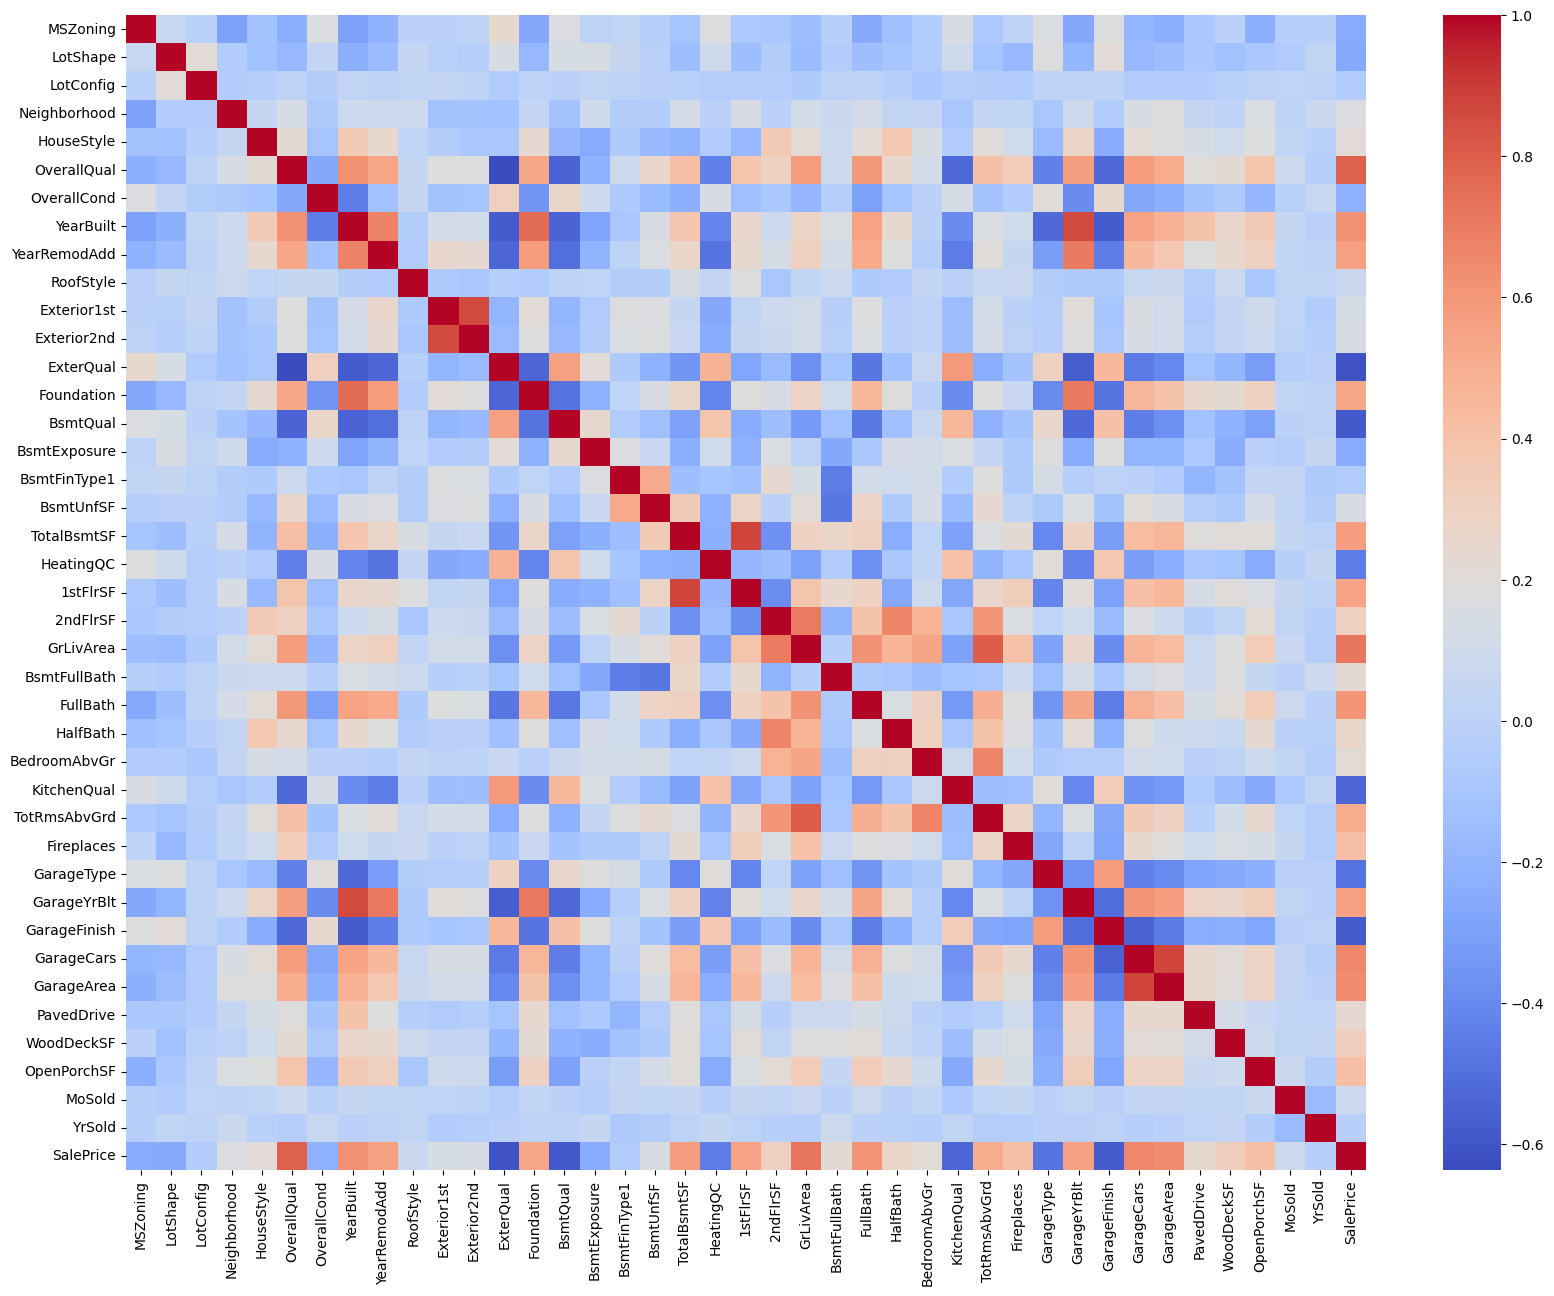

In [20]:
corrmap = train.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corrmap , cmap = 'coolwarm')

In [21]:
# GarageType and GarageFinish are negative correlation with SalePrice 
train.drop(['GarageType','GarageFinish'],axis = 1,inplace = True)
test.drop(['GarageType','GarageFinish'],axis = 1,inplace = True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1091 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1091 non-null   int64  
 1   LotShape      1091 non-null   int64  
 2   LotConfig     1091 non-null   int64  
 3   Neighborhood  1091 non-null   int64  
 4   HouseStyle    1091 non-null   int64  
 5   OverallQual   1091 non-null   int64  
 6   OverallCond   1091 non-null   int64  
 7   YearBuilt     1091 non-null   int64  
 8   YearRemodAdd  1091 non-null   int64  
 9   RoofStyle     1091 non-null   int64  
 10  Exterior1st   1091 non-null   int64  
 11  Exterior2nd   1091 non-null   int64  
 12  ExterQual     1091 non-null   int64  
 13  Foundation    1091 non-null   int64  
 14  BsmtQual      1091 non-null   int64  
 15  BsmtExposure  1091 non-null   int64  
 16  BsmtFinType1  1091 non-null   int64  
 17  BsmtUnfSF     1091 non-null   int64  
 18  TotalBsmtSF   1091 non-null   int

In [23]:
X = train.drop(['SalePrice'],axis = 1)
Y = train['SalePrice']

In [24]:
# knn imputer
from sklearn.impute import KNNImputer
im = KNNImputer(n_neighbors = 5)
X = im.fit_transform(X)

In [25]:
test = im.transform(test)

* Why imputer? I observe the correlation map,GarageYrBlt have little high positive correlation with target variable,so I decide to imputer data

# Model

1. train_test_split

In [26]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y, test_size = 0.2)

In [27]:
# X.columns

2. Standardization

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

3. XGBoost

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor 
xgb_model = XGBRegressor()
param_search={
    'n_estimators':[100,200,300],
    'max_depth':[1,3,5,7],
    'learning_rate':[0.001,0.05,0.01,0.1]
}
xgb_grid = GridSearchCV(xgb_model , param_search ,cv=5)
xgb_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.05, 0.01, 0.1],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [30]:
print('Best:',xgb_grid.best_params_)
print('Score:',xgb_grid.best_score_)

Best: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}
Score: 0.8943678278503832


In [31]:
from sklearn.metrics import r2_score
predict = xgb_grid.predict(x_test)
score = r2_score(y_test , predict)
print('Score:',score)

Score: 0.9088229827247651


# Submit

In [32]:
submit = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
test_predict = xgb_grid.predict(test)
submit.SalePrice = test_predict
submit.to_csv('submission.csv', index = False)
submit.head()

,Id,SalePrice
0,1461,124483.656250
1,1462,155929.640625
2,1463,172512.203125
3,1464,185914.062500
4,1465,191819.671875
